# Hierarchical clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
air = pd.read_excel("C:/Users/LENOVO/Downloads/EastWestAirlines1.xlsx")

In [3]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(air.iloc[:,1:])

In [6]:
#dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [9]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


# KMEANS clustering

In [11]:
from sklearn.cluster import KMeans

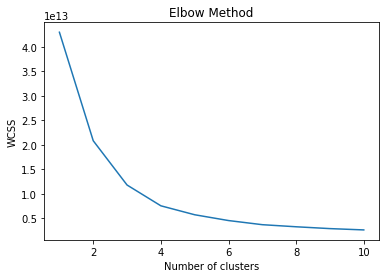

In [12]:
wcss = [] #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(air)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(air)

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters_new.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
air['clusterid_new'] = clusters_new.labels_

In [16]:
clusters_new.cluster_centers_

array([[1.28475223e+05, 2.20312500e+02, 2.94057377e+00, 1.00922131e+00,
        1.03278689e+00, 3.12562367e+04, 1.64866803e+01, 7.55908811e+02,
        2.15573770e+00, 4.74804406e+03, 4.42622951e-01],
       [3.23009849e+05, 3.37248649e+02, 3.14594595e+00, 1.01621622e+00,
        1.00000000e+00, 4.36441189e+04, 1.85837838e+01, 1.28333514e+03,
        3.88108108e+00, 5.53258378e+03, 6.27027027e-01],
       [3.10393823e+04, 1.01553343e+02, 1.67034139e+00, 1.01635846e+00,
        1.00497866e+00, 1.01277610e+04, 9.34423898e+00, 2.90393314e+02,
        8.85490754e-01, 3.78537055e+03, 3.23968706e-01],
       [8.42320231e+05, 5.12692308e+02, 3.34615385e+00, 1.00000000e+00,
        1.11538462e+00, 5.77971923e+04, 2.27307692e+01, 1.84588462e+03,
        6.96153846e+00, 6.46300000e+03, 8.46153846e-01]])

In [17]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,128368.880368,219.861963,2.942740,1.009202,1.032720,31266.535787,16.514315,755.497955,2.159509,4745.501022,0.442740
1,1,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135,3.881081,5532.583784,0.627027
2,2,31007.044840,101.625623,1.668683,1.016370,1.004982,10109.138434,9.329537,290.204982,0.883274,3785.570463,0.323843
3,3,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154


In [18]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


# DB-SCAN clustering

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [20]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 359.4 KB


In [21]:
air.drop(['clusterid_new'],axis=1,inplace=True)

In [22]:
array=air.values

In [23]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [24]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [25]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [27]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [29]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [30]:
pd.concat([air,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
